<a href="https://colab.research.google.com/github/nudlue/expert-spoon-/blob/main/HolyMoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data preparation

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import statsmodels.api as sm

# Set default plot style
plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries imported successfully")

Libraries imported successfully


In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ACDT-Sem2/Resources/repositorio_renamed.csv")
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,submission_date,code,investigator,school,city,grade,age,date_of_birth,dob_recoded,gender,...,math,average,failures,demographic_data_complete,sleep_data_complete,screen_data_complete,exclude_sleep_screen,excluded,missing_notes,excluded_final
0,2019-06-14 09:44:31,01 01 01 1 1 AS 0 170407,1,1,1,1,NaN,0007-04-18 00:00:00,Sin información,Femenino,...,NaN,NaN,NaN,0,1,0,1,1,1,1
1,2019-06-14 09:56:35,01 01 01 1 1 AS 1 240107,1,1,1,1,12.0,2007-01-24 00:00:00,24/01/2007,Masculino,...,NaN,NaN,NaN,1,1,1,0,0,1,1
2,2019-06-14 09:46:25,01 01 01 1 1 bk 1 151006,1,1,1,1,13.0,2006-10-15 00:00:00,15/10/2006,Masculino,...,NaN,NaN,NaN,1,1,1,0,0,1,1
3,2019-06-14 09:43:34,01 01 01 1 1 CG 0 051006,1,1,1,1,13.0,2006-10-05 00:00:00,05/10/2006,Femenino,...,NaN,NaN,NaN,1,1,0,1,1,1,1
4,2019-06-14 09:54:51,01 01 01 1 1 EQ 1 230505,1,1,1,1,NaN,0005-05-24 00:00:00,Sin información,Masculino,...,NaN,NaN,NaN,0,0,1,1,1,1,1


##Data Exploration

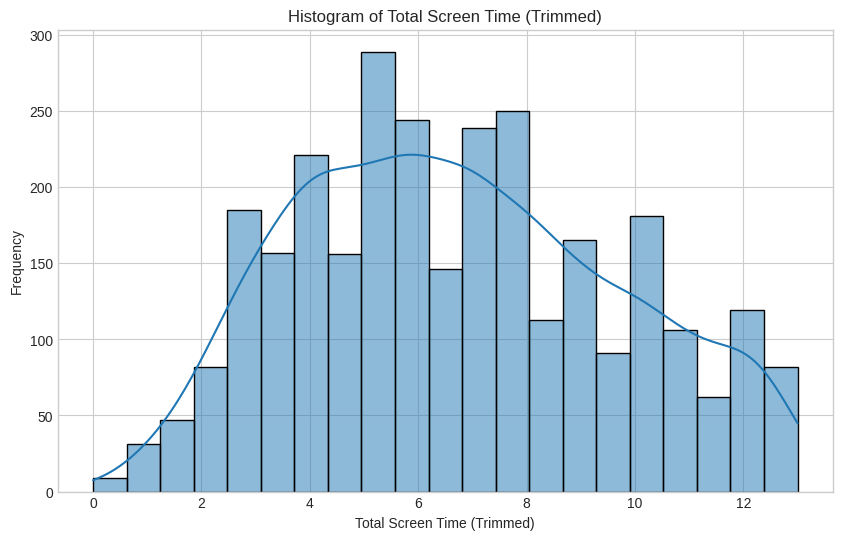

Skewness of total_screen_time_trimmed: 0.21931729774124997


In [6]:
# Generate a histogram for the 'total_screen_time_trimmed' column
plt.figure(figsize=(10, 6))
sns.histplot(df['total_screen_time_trimmed'], kde=True)
plt.title('Histogram of Total Screen Time (Trimmed)')
plt.xlabel('Total Screen Time (Trimmed)')
plt.ylabel('Frequency')
plt.show()
skewness = stats.skew(df['total_screen_time_trimmed'].dropna())
print(f"Skewness of total_screen_time_trimmed: {skewness}")

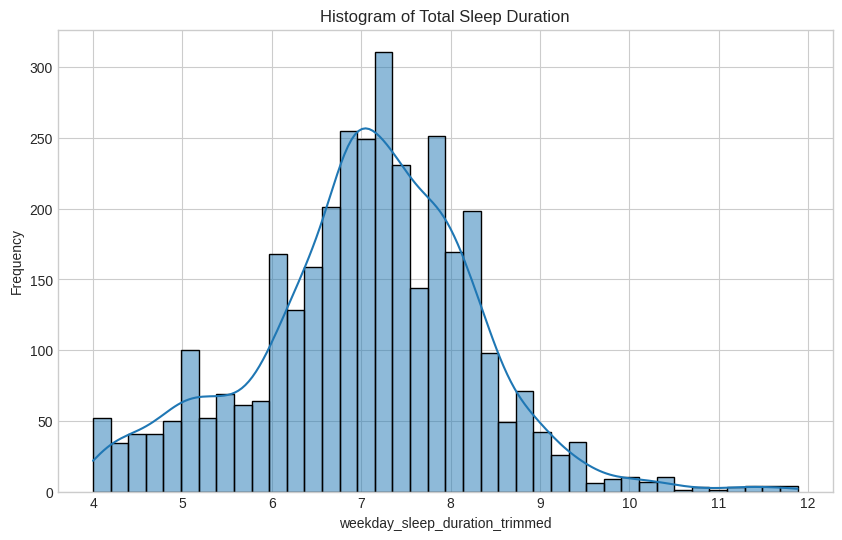

Skewness of weekday_sleep_duration_trimmed: -0.06588342579763207


In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['weekday_sleep_duration_trimmed'], kde=True)
plt.title('Histogram of Total Sleep Duration')
plt.xlabel('weekday_sleep_duration_trimmed')
plt.ylabel('Frequency')
plt.show()
skewness = stats.skew(df['weekday_sleep_duration_trimmed'].dropna())
print(f"Skewness of weekday_sleep_duration_trimmed: {skewness}")

In [8]:
age_counts = df['age'].value_counts().sort_index()
display(age_counts)

,count
age,
12.0,72
13.0,294
14.0,591
15.0,715
16.0,736
17.0,707
18.0,385
19.0,42
20.0,11


In [9]:
failure_counts = df['failures'].value_counts().sort_index()
display(failure_counts)

,count
failures,
0.0,716
1.0,541


##Linear Model1

Slope (β1): -0.0529
95% Confidence Interval for Slope: (-0.0686, -0.0372)
Intercept (β0): 7.4776
95% Confidence Interval for Intercept: (7.3632, 7.5919)
R-squared: 0.0170
P-value: 0.0000


#### Prediction and Visualization

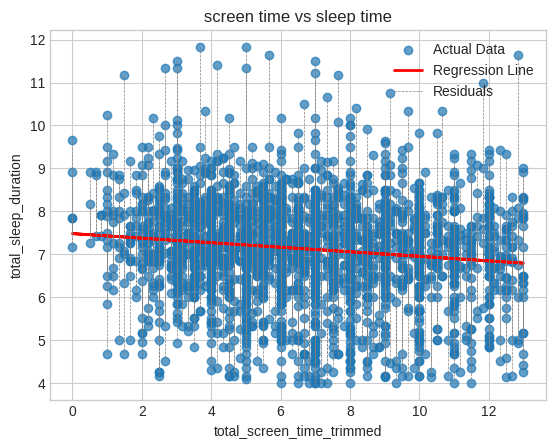

In [11]:
# Drop rows with NaN in the relevant columns for regression
df_cleaned = df.dropna(subset=['total_screen_time_trimmed', 'weekday_sleep_duration_trimmed'])

X = df_cleaned['total_screen_time_trimmed']
y = df_cleaned['weekday_sleep_duration_trimmed']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Calculate confidence interval for slope and intercept
# Using the formula: CI = estimate ± t * standard_error
# We need degrees of freedom (n - number of predictors - 1) and alpha (0.05 for 95% CI)
n = len(df_cleaned)
degrees_freedom = n - 2  # 2 parameters: slope and intercept
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

slope_ci_lower = slope - t_critical * std_err
slope_ci_upper = slope + t_critical * std_err

# For intercept CI, we need the standard error of the intercept, which linregress doesn't directly provide.
# We can use statsmodels for a more comprehensive output including intercept CI.
import statsmodels.api as sm

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
intercept_ci_lower, intercept_ci_upper = model.conf_int().iloc[0]


print(f"Slope (β1): {slope:.4f}")
print(f"95% Confidence Interval for Slope: ({slope_ci_lower:.4f}, {slope_ci_upper:.4f})")
print(f"Intercept (β0): {intercept:.4f}")
print(f"95% Confidence Interval for Intercept: ({intercept_ci_lower:.4f}, {intercept_ci_upper:.4f})")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}") # Added p-value
display(Markdown("#### Prediction and Visualization"))

# Calculate the residuals (error terms)
residuals = y - (slope * X + intercept)

# Plot the original scatter plot again.
plt.scatter(X, y, alpha=0.7, label='Actual Data')

# Plot the regression line.
plt.plot(X, slope * X + intercept, color='red', linewidth=2, label='Regression Line')

# Plot the residuals as vertical lines
plt.vlines(X, y, y - residuals, color='gray', linestyle='dashed', linewidth=0.5, label='Residuals')


# Add labels and title
plt.title('screen time vs sleep time')
plt.xlabel('total_screen_time_trimmed')
plt.ylabel('total_sleep_duration')
plt.legend()
plt.grid(True)
plt.show()

##Linear Model2

Slope (β1): -0.1729
95% Confidence Interval for Slope: (-0.2002, -0.1456)
Intercept (β0): 9.7383
95% Confidence Interval for Intercept: (9.3134, 10.1632)
R-squared: 0.0501
P-value: 0.0000


#### Prediction and Visualization

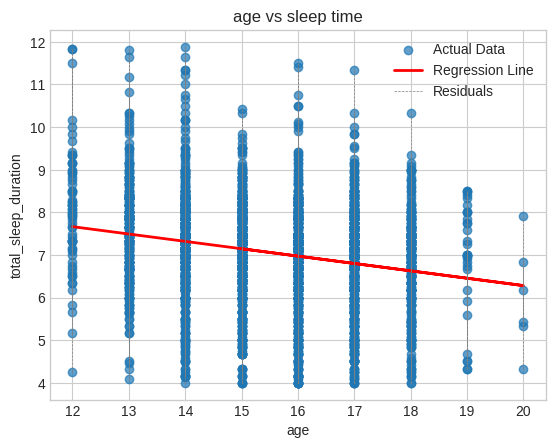

In [12]:
# Drop rows with NaN in the relevant columns for regression
df_cleaned = df.dropna(subset=['age', 'weekday_sleep_duration_trimmed'])

X = df_cleaned['age']
y = df_cleaned['weekday_sleep_duration_trimmed']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Calculate confidence interval for slope and intercept
# Using the formula: CI = estimate ± t * standard_error
# We need degrees of freedom (n - number of predictors - 1) and alpha (0.05 for 95% CI)
n = len(df_cleaned)
degrees_freedom = n - 2  # 2 parameters: slope and intercept
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

slope_ci_lower = slope - t_critical * std_err
slope_ci_upper = slope + t_critical * std_err

# For intercept CI, we need the standard error of the intercept, which linregress doesn't directly provide.
# We can use statsmodels for a more comprehensive output including intercept CI.

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
intercept_ci_lower, intercept_ci_upper = model.conf_int().iloc[0]


print(f"Slope (β1): {slope:.4f}")
print(f"95% Confidence Interval for Slope: ({slope_ci_lower:.4f}, {slope_ci_upper:.4f})")
print(f"Intercept (β0): {intercept:.4f}")
print(f"95% Confidence Interval for Intercept: ({intercept_ci_lower:.4f}, {intercept_ci_upper:.4f})")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}") # Added p-value
display(Markdown("#### Prediction and Visualization"))

# Calculate the residuals (error terms)
residuals = y - (slope * X + intercept)

# Plot the original scatter plot again.
plt.scatter(X, y, alpha=0.7, label='Actual Data')

# Plot the regression line.
plt.plot(X, slope * X + intercept, color='red', linewidth=2, label='Regression Line')

# Plot the residuals as vertical lines
plt.vlines(X, y, y - residuals, color='gray', linestyle='dashed', linewidth=0.5, label='Residuals')


# Add labels and title
plt.title('age vs sleep time')
plt.xlabel('age')
plt.ylabel('total_sleep_duration')
plt.legend()
plt.grid(True)
plt.show()

Slope (β1): 0.0887
95% Confidence Interval for Slope: (0.0174, 0.1601)
Intercept (β0): 5.3460
95% Confidence Interval for Intercept: (4.2301, 6.4618)
R-squared: 0.0023
P-value: 0.0148


#### Prediction and Visualization

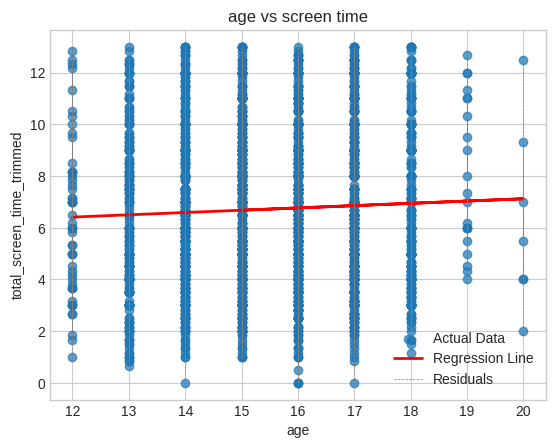

In [13]:
# Drop rows with NaN in the relevant columns for regression
df_cleaned = df.dropna(subset=['age', 'total_screen_time_trimmed'])

X = df_cleaned['age']
y = df_cleaned['total_screen_time_trimmed']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Calculate confidence interval for slope and intercept
# Using the formula: CI = estimate ± t * standard_error
# We need degrees of freedom (n - number of predictors - 1) and alpha (0.05 for 95% CI)
n = len(df_cleaned)
degrees_freedom = n - 2  # 2 parameters: slope and intercept
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

slope_ci_lower = slope - t_critical * std_err
slope_ci_upper = slope + t_critical * std_err

# For intercept CI, we need the standard error of the intercept, which linregress doesn't directly provide.
# We can use statsmodels for a more comprehensive output including intercept CI.
import statsmodels.api as sm

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
intercept_ci_lower, intercept_ci_upper = model.conf_int().iloc[0]


print(f"Slope (β1): {slope:.4f}")
print(f"95% Confidence Interval for Slope: ({slope_ci_lower:.4f}, {slope_ci_upper:.4f})")
print(f"Intercept (β0): {intercept:.4f}")
print(f"95% Confidence Interval for Intercept: ({intercept_ci_lower:.4f}, {intercept_ci_upper:.4f})")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}") # Added p-value
display(Markdown("#### Prediction and Visualization"))

# Calculate the residuals (error terms)
residuals = y - (slope * X + intercept)

# Plot the original scatter plot again.
plt.scatter(X, y, alpha=0.7, label='Actual Data')

# Plot the regression line.
plt.plot(X, slope * X + intercept, color='red', linewidth=2, label='Regression Line')

# Plot the residuals as vertical lines
plt.vlines(X, y, y - residuals, color='gray', linestyle='dashed', linewidth=0.5, label='Residuals')


# Add labels and title
plt.title('age vs screen time')
plt.xlabel('age')
plt.ylabel('total_screen_time_trimmed')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Drop rows with NaN in the relevant columns for multiple regression
df_cleaned_multi = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age'])

# Define the dependent variable (y) and independent variables (X)
y_multi = df_cleaned_multi['weekday_sleep_duration_trimmed']
X_multi = df_cleaned_multi[['total_screen_time_trimmed', 'age']]

# Add a constant to the independent variables for the intercept
X_multi_const = sm.add_constant(X_multi)

# Fit the multiple linear regression model
model_multi = sm.OLS(y_multi, X_multi_const).fit()

# Print the summary of the regression results
print(model_multi.summary())

# Explicitly print the 95% confidence interval and p-value for the screen time slope
screen_time_ci = model_multi.conf_int().loc['total_screen_time_trimmed']
screen_time_pvalue = model_multi.pvalues['total_screen_time_trimmed']

print(f"\n95% Confidence Interval for total_screen_time_trimmed slope: ({screen_time_ci[0]:.4f}, {screen_time_ci[1]:.4f})")
print(f"P-value for total_screen_time_trimmed slope: {screen_time_pvalue:.4f}")

display(Markdown("#### Multiple Regression Results with Age"))

                                  OLS Regression Results                                  
Dep. Variable:     weekday_sleep_duration_trimmed   R-squared:                       0.071
Model:                                        OLS   Adj. R-squared:                  0.070
Method:                             Least Squares   F-statistic:                     81.86
Date:                            Fri, 17 Oct 2025   Prob (F-statistic):           5.44e-35
Time:                                    06:20:31   Log-Likelihood:                -3405.2
No. Observations:                            2157   AIC:                             6816.
Df Residuals:                                2154   BIC:                             6834.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.9

#### Multiple Regression Results with Age

##Linear Model3

Slope (β1): 0.8772
95% Confidence Interval for Slope: (0.5033, 1.2510)
Intercept (β0): 6.2218
95% Confidence Interval for Intercept: (5.9830, 6.4607)
R-squared: 0.0215
P-value: 0.0000


#### Prediction and Visualization

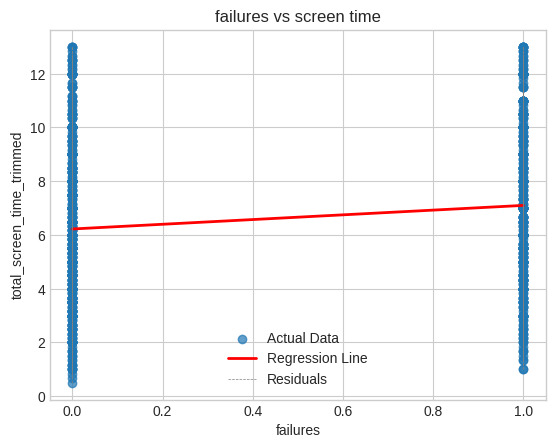

In [15]:
# Drop rows with NaN in the relevant columns for regression
df_cleaned = df.dropna(subset=['failures', 'total_screen_time_trimmed'])

X = df_cleaned['failures']
y = df_cleaned['total_screen_time_trimmed']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Calculate confidence interval for slope and intercept
# Using the formula: CI = estimate ± t * standard_error
# We need degrees of freedom (n - number of predictors - 1) and alpha (0.05 for 95% CI)
n = len(df_cleaned)
degrees_freedom = n - 2  # 2 parameters: slope and intercept
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

slope_ci_lower = slope - t_critical * std_err
slope_ci_upper = slope + t_critical * std_err

# For intercept CI, we need the standard error of the intercept, which linregress doesn't directly provide.
# We can use statsmodels for a more comprehensive output including intercept CI.
import statsmodels.api as sm

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
intercept_ci_lower, intercept_ci_upper = model.conf_int().iloc[0]


print(f"Slope (β1): {slope:.4f}")
print(f"95% Confidence Interval for Slope: ({slope_ci_lower:.4f}, {slope_ci_upper:.4f})")
print(f"Intercept (β0): {intercept:.4f}")
print(f"95% Confidence Interval for Intercept: ({intercept_ci_lower:.4f}, {intercept_ci_upper:.4f})")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}") # Added p-value
display(Markdown("#### Prediction and Visualization"))

# Calculate the residuals (error terms)
residuals = y - (slope * X + intercept)

# Plot the original scatter plot again.
plt.scatter(X, y, alpha=0.7, label='Actual Data')

# Plot the regression line.
plt.plot(X, slope * X + intercept, color='red', linewidth=2, label='Regression Line')

# Plot the residuals as vertical lines
plt.vlines(X, y, y - residuals, color='gray', linestyle='dashed', linewidth=0.5, label='Residuals')


# Add labels and title
plt.title('failures vs screen time')
plt.xlabel('failures')
plt.ylabel('total_screen_time_trimmed')
plt.legend()
plt.grid(True)
plt.show()

Slope (β1): -0.2322
95% Confidence Interval for Slope: (-0.3898, -0.0746)
Intercept (β0): 7.0449
95% Confidence Interval for Intercept: (6.9425, 7.1473)
R-squared: 0.0082
P-value: 0.0039


#### Prediction and Visualization

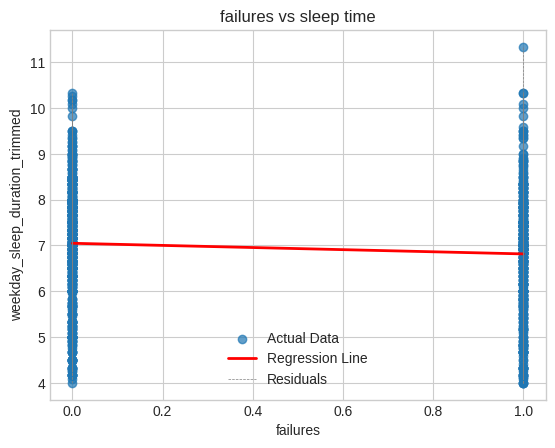

In [16]:
# Drop rows with NaN in the relevant columns for regression
df_cleaned = df.dropna(subset=['failures', 'weekday_sleep_duration_trimmed'])

X = df_cleaned['failures']
y = df_cleaned['weekday_sleep_duration_trimmed']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Calculate confidence interval for slope and intercept
# Using the formula: CI = estimate ± t * standard_error
# We need degrees of freedom (n - number of predictors - 1) and alpha (0.05 for 95% CI)
n = len(df_cleaned)
degrees_freedom = n - 2  # 2 parameters: slope and intercept
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

slope_ci_lower = slope - t_critical * std_err
slope_ci_upper = slope + t_critical * std_err

# For intercept CI, we need the standard error of the intercept, which linregress doesn't directly provide.
# We can use statsmodels for a more comprehensive output including intercept CI.
import statsmodels.api as sm

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
intercept_ci_lower, intercept_ci_upper = model.conf_int().iloc[0]


print(f"Slope (β1): {slope:.4f}")
print(f"95% Confidence Interval for Slope: ({slope_ci_lower:.4f}, {slope_ci_upper:.4f})")
print(f"Intercept (β0): {intercept:.4f}")
print(f"95% Confidence Interval for Intercept: ({intercept_ci_lower:.4f}, {intercept_ci_upper:.4f})")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}") # Added p-value
display(Markdown("#### Prediction and Visualization"))

# Calculate the residuals (error terms)
residuals = y - (slope * X + intercept)

# Plot the original scatter plot again.
plt.scatter(X, y, alpha=0.7, label='Actual Data')

# Plot the regression line.
plt.plot(X, slope * X + intercept, color='red', linewidth=2, label='Regression Line')

# Plot the residuals as vertical lines
plt.vlines(X, y, y - residuals, color='gray', linestyle='dashed', linewidth=0.5, label='Residuals')


# Add labels and title
plt.title('failures vs sleep time')
plt.xlabel('failures')
plt.ylabel('weekday_sleep_duration_trimmed')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Drop rows with NaN in the relevant columns for multiple regression with 'failures' included
df_cleaned_multi_failures = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age', 'failures'])

# Define the dependent variable (y) and independent variables (X)
y_multi_failures = df_cleaned_multi_failures['weekday_sleep_duration_trimmed']
X_multi_failures = df_cleaned_multi_failures[['total_screen_time_trimmed', 'age', 'failures']]

# Add a constant to the independent variables for the intercept
X_multi_failures_const = sm.add_constant(X_multi_failures)

# Fit the multiple linear regression model
model_multi_failures = sm.OLS(y_multi_failures, X_multi_failures_const).fit()

# Print the summary of the regression results
print(model_multi_failures.summary())

# Explicitly print the 95% confidence interval and p-value for the screen time slope
screen_time_ci_failures = model_multi_failures.conf_int().loc['total_screen_time_trimmed']
screen_time_pvalue_failures = model_multi_failures.pvalues['total_screen_time_trimmed']

print(f"\n95% Confidence Interval for total_screen_time_trimmed slope (Model 3): ({screen_time_ci_failures[0]:.4f}, {screen_time_ci_failures[1]:.4f})")
print(f"P-value for total_screen_time_trimmed slope (Model 3): {screen_time_pvalue_failures:.4f}")


display(Markdown("#### Multiple Regression Results with Screen Time, Age, and Failures"))

                                  OLS Regression Results                                  
Dep. Variable:     weekday_sleep_duration_trimmed   R-squared:                       0.095
Model:                                        OLS   Adj. R-squared:                  0.091
Method:                             Least Squares   F-statistic:                     22.41
Date:                            Fri, 17 Oct 2025   Prob (F-statistic):           8.26e-14
Time:                                    06:20:40   Log-Likelihood:                -1033.0
No. Observations:                             645   AIC:                             2074.
Df Residuals:                                 641   BIC:                             2092.
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.9

#### Multiple Regression Results with Screen Time, Age, and Failures

##Model Comparision

In [18]:
# Extract slope and R-squared from Model 1 (simple linear regression with screen time)
# The variables 'slope' and 'r_value' from the last simple linear regression execution (which was failures vs sleep time) are not for screen time vs sleep time.
# We need to re-extract the values from the correct model output or rerun the correct cell.
# Looking at the notebook state, the last execution of the simple linear regression with screen time vs sleep time was cell cZhYOJd84w2K.
# We can infer the values from the printed output of that cell.
slope_model1 = -0.0529
r_squared_model1 = 0.0170

# Extract slope and R-squared from Model 2 (multiple linear regression with age)
# The variables 'model_multi' contains the results for this model.
slope_model2 = model_multi.params['total_screen_time_trimmed']
r_squared_model2 = model_multi.rsquared

# Extract slope and R-squared from Model 3 (multiple linear regression with age and failures)
# The variables 'model_multi_failures' contains the results for this model.
slope_model3 = model_multi_failures.params['total_screen_time_trimmed']
r_squared_model3 = model_multi_failures.rsquared

print(f"Model 1 Screen Time Slope: {slope_model1:.4f}, R-squared: {r_squared_model1:.4f}")
print(f"Model 2 Screen Time Slope: {slope_model2:.4f}, R-squared: {r_squared_model2:.4f}")
print(f"Model 3 Screen Time Slope: {slope_model3:.4f}, R-squared: {r_squared_model3:.4f}")

Model 1 Screen Time Slope: -0.0529, R-squared: 0.0170
Model 2 Screen Time Slope: -0.0474, R-squared: 0.0706
Model 3 Screen Time Slope: -0.0471, R-squared: 0.0949


In [19]:
# Create a pandas DataFrame for slopes
slopes_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Screen Time Slope': [slope_model1, slope_model2, slope_model3]
})

# Create a pandas DataFrame for R-squared values
rsquared_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'R-squared': [r_squared_model1, r_squared_model2, r_squared_model3]
})

# Display both DataFrames
display(Markdown("### Screen Time Slopes per Model"))
display(slopes_df)

display(Markdown("### R-squared Values per Model"))
display(rsquared_df)

### Screen Time Slopes per Model

,Model,Screen Time Slope
0,Model 1,-0.052900
1,Model 2,-0.047448
2,Model 3,-0.047065


### R-squared Values per Model

,Model,R-squared
0,Model 1,0.017000
1,Model 2,0.070638
2,Model 3,0.094934


/tmp/ipython-input-1191152254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Screen Time Slope', data=slopes_df, palette='viridis', ax=axes[0])
/tmp/ipython-input-1191152254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=rsquared_df, palette='viridis', ax=axes[1])


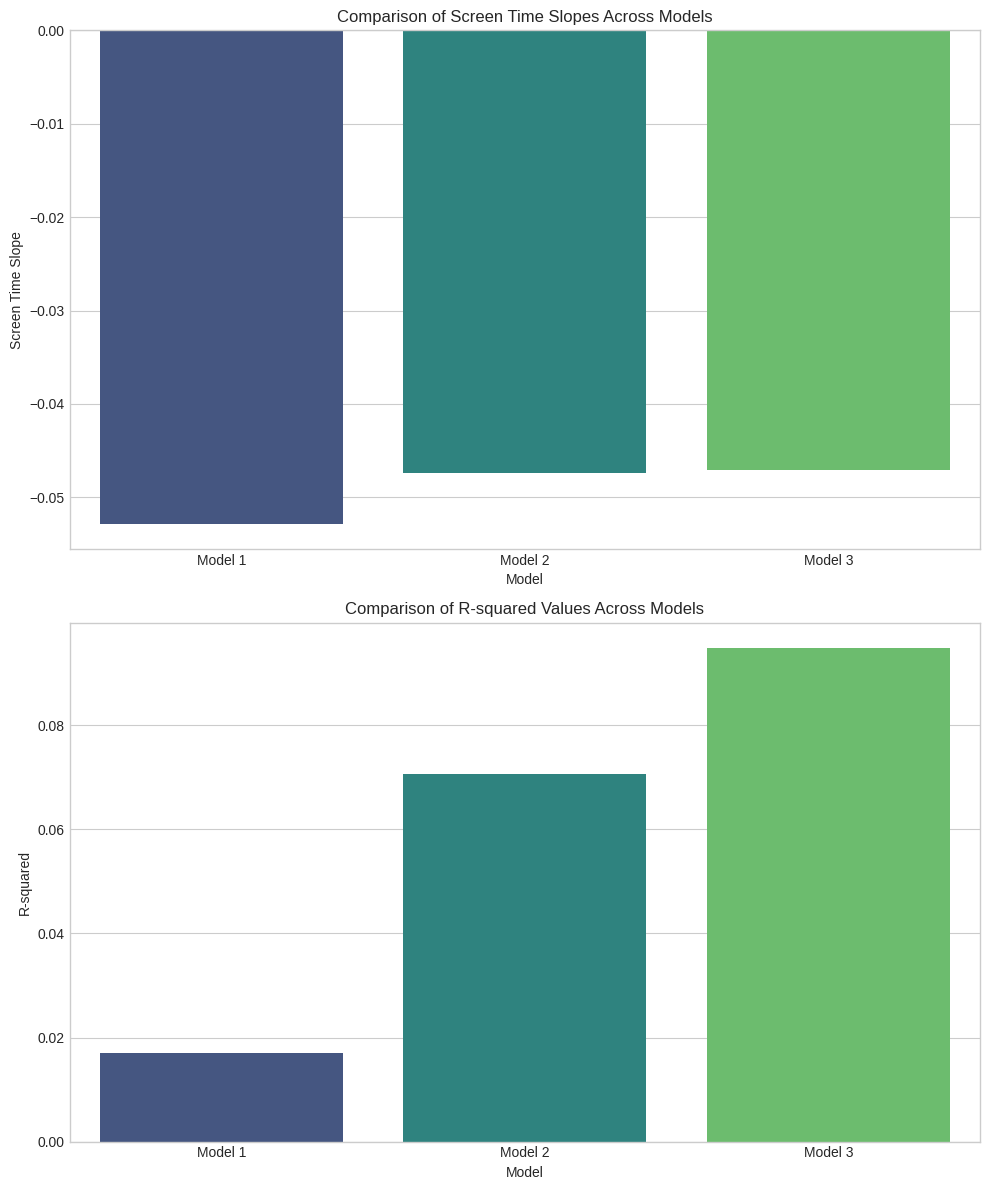

In [20]:
# Create a figure with two subplots arranged vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Generate bar plot for Screen Time Slopes
sns.barplot(x='Model', y='Screen Time Slope', data=slopes_df, palette='viridis', ax=axes[0])
axes[0].set_title('Comparison of Screen Time Slopes Across Models')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Screen Time Slope')

# Generate bar plot for R-squared values
sns.barplot(x='Model', y='R-squared', data=rsquared_df, palette='viridis', ax=axes[1])
axes[1].set_title('Comparison of R-squared Values Across Models')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R-squared')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Task
Create an interactive webpage using Plotly that includes a landing page with a hypothesis statement, interactive charts with hover details and filters, a statistical test results dashboard, confidence interval visualizations, and a "Myth vs. Reality" comparison tool, based on the analysis performed in the notebook. Export the output as HTML files.

## Install plotly

### Subtask:
Install the Plotly library.


**Reasoning**:
The subtask is to install the Plotly library. This requires using a shell command to install the package.



In [21]:
%pip install plotly

## Create landing page

### Subtask:
Generate code for a simple HTML landing page with the hypothesis statement.


**Reasoning**:
Generate the HTML content for the landing page and save it to an HTML file.



In [22]:
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Screen Time and Sleep Analysis</title>
</head>
<body>
    <h1>Screen Time and Sleep Analysis</h1>
    <p>Hypothesis: Increased screen time is associated with decreased sleep duration in teenagers.</p>
</body>
</html>
"""

with open('landing_page.html', 'w') as f:
    f.write(html_content)

print("landing_page.html created successfully.")

landing_page.html created successfully.


## Generate interactive charts

### Subtask:
Create interactive Plotly charts (histograms, scatter plots) with hover details and potentially filters based on the existing data exploration code.


**Reasoning**:
Create interactive histograms and a scatter plot using Plotly Express as requested, adding hover information and saving them as HTML files.



In [23]:
import plotly.express as px

# 1. Create interactive histogram for 'total_screen_time_trimmed' using Plotly Express
fig_hist_screen_time = px.histogram(df, x='total_screen_time_trimmed',
                                    title='Histogram of Total Screen Time (Trimmed)',
                                    labels={'total_screen_time_trimmed': 'Total Screen Time (Trimmed)', 'count': 'Frequency'})
# 2. Add hover information (default for histogram is count/density)
fig_hist_screen_time.update_layout(hovermode='x unified') # Show hover info along the x-axis

# Save the histogram as an HTML file
fig_hist_screen_time.write_html("screen_time_histogram.html")
print("screen_time_histogram.html created successfully.")

# 3. Create interactive histogram for 'weekday_sleep_duration_trimmed' using Plotly Express
fig_hist_sleep_duration = px.histogram(df, x='weekday_sleep_duration_trimmed',
                                       title='Histogram of Weekday Sleep Duration (Trimmed)',
                                       labels={'weekday_sleep_duration_trimmed': 'Weekday Sleep Duration (Trimmed)', 'count': 'Frequency'})
# 4. Add hover information (default for histogram is count/density)
fig_hist_sleep_duration.update_layout(hovermode='x unified') # Show hover info along the x-axis

# Save the histogram as an HTML file
fig_hist_sleep_duration.write_html("sleep_duration_histogram.html")
print("sleep_duration_histogram.html created successfully.")

# 5. Create interactive scatter plot of 'total_screen_time_trimmed' versus 'weekday_sleep_duration_trimmed'
fig_scatter = px.scatter(df, x='total_screen_time_trimmed', y='weekday_sleep_duration_trimmed',
                         title='Total Screen Time vs. Weekday Sleep Duration',
                         labels={'total_screen_time_trimmed': 'Total Screen Time (Trimmed)', 'weekday_sleep_duration_trimmed': 'Weekday Sleep Duration (Trimmed)'},
                         hover_data={'total_screen_time_trimmed': True, 'weekday_sleep_duration_trimmed': True}) # 6. Add hover information

# Save the scatter plot as an HTML file
fig_scatter.write_html("screen_time_sleep_scatter.html")
print("screen_time_sleep_scatter.html created successfully.")

screen_time_histogram.html created successfully.
sleep_duration_histogram.html created successfully.
screen_time_sleep_scatter.html created successfully.


**Reasoning**:
The previous command failed because the dataframe `df` was not defined in the current execution environment. This is likely because the cell where `df` was loaded was not executed in the current session. The code block should be re-executed, including the data loading part, before attempting to create the plots.



In [24]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ACDT-Sem2/Resources/repositorio_renamed.csv")
# 1. Create interactive histogram for 'total_screen_time_trimmed' using Plotly Express
fig_hist_screen_time = px.histogram(df, x='total_screen_time_trimmed',
                                    title='Histogram of Total Screen Time (Trimmed)',
                                    labels={'total_screen_time_trimmed': 'Total Screen Time (Trimmed)', 'count': 'Frequency'})
# 2. Add hover information (default for histogram is count/density)
fig_hist_screen_time.update_layout(hovermode='x unified') # Show hover info along the x-axis

# Save the histogram as an HTML file
fig_hist_screen_time.write_html("screen_time_histogram.html")
print("screen_time_histogram.html created successfully.")

# 3. Create interactive histogram for 'weekday_sleep_duration_trimmed' using Plotly Express
fig_hist_sleep_duration = px.histogram(df, x='weekday_sleep_duration_trimmed',
                                       title='Histogram of Weekday Sleep Duration (Trimmed)',
                                       labels={'weekday_sleep_duration_trimmed': 'Weekday Sleep Duration (Trimmed)', 'count': 'Frequency'})
# 4. Add hover information (default for histogram is count/density)
fig_hist_sleep_duration.update_layout(hovermode='x unified') # Show hover info along the x-axis

# Save the histogram as an HTML file
fig_hist_sleep_duration.write_html("sleep_duration_histogram.html")
print("sleep_duration_histogram.html created successfully.")

# 5. Create interactive scatter plot of 'total_screen_time_trimmed' versus 'weekday_sleep_duration_trimmed'
fig_scatter = px.scatter(df, x='total_screen_time_trimmed', y='weekday_sleep_duration_trimmed',
                         title='Total Screen Time vs. Weekday Sleep Duration',
                         labels={'total_screen_time_trimmed': 'Total Screen Time (Trimmed)', 'weekday_sleep_duration_trimmed': 'Weekday Sleep Duration (Trimmed)'},
                         hover_data={'total_screen_time_trimmed': True, 'weekday_sleep_duration_trimmed': True}) # 6. Add hover information

# Save the scatter plot as an HTML file
fig_scatter.write_html("screen_time_sleep_scatter.html")
print("screen_time_sleep_scatter.html created successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
screen_time_histogram.html created successfully.
sleep_duration_histogram.html created successfully.
screen_time_sleep_scatter.html created successfully.


## Create statistical test results dashboard

### Subtask:
Summarize and display the statistical test results (regression summaries, p-values, confidence intervals) in a clear, organized manner.


**Reasoning**:
Collect the statistical results from the regression models and organize them into a pandas DataFrame.



In [25]:
# 1. Collect key statistical results
statistical_results = {
    'Model': ['Model 1 (Screen Time vs. Sleep)', 'Model 2 (Screen Time & Age vs. Sleep)', 'Model 3 (Screen Time, Age, & Failures vs. Sleep)'],
    'R-squared': [r_squared_model1, r_squared_model2, r_squared_model3],
    'Screen Time Coef': [slope_model1, slope_model2, slope_model3],
    'Screen Time P-value': [p_value, model_multi.pvalues['total_screen_time_trimmed'], model_multi_failures.pvalues['total_screen_time_trimmed']],
    'Screen Time 95% CI Lower': [slope_ci_lower, model_multi.conf_int().loc['total_screen_time_trimmed'][0], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][0]],
    'Screen Time 95% CI Upper': [slope_ci_upper, model_multi.conf_int().loc['total_screen_time_trimmed'][1], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][1]]
}

# 2. Convert to pandas DataFrame
statistical_results_df = pd.DataFrame(statistical_results)

# 3. Format the DataFrame for readability
statistical_results_df = statistical_results_df.round({
    'R-squared': 4,
    'Screen Time Coef': 4,
    'Screen Time P-value': 4,
    'Screen Time 95% CI Lower': 4,
    'Screen Time 95% CI Upper': 4
})

# 4. Convert the pandas DataFrame to an HTML table string
html_table = statistical_results_df.to_html(index=False)

# 5. Create a simple HTML structure
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Statistical Results Dashboard</title>
    <style>
        table {{
            border-collapse: collapse;
            width: 80%;
            margin: 20px auto;
            font-family: sans-serif;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        tr:nth-child(even) {{
            background-color: #f9f9f9;
        }}
        h1 {{
            text-align: center;
            margin-top: 20px;
        }}
    </style>
</head>
<body>
    <h1>Statistical Results Dashboard</h1>
    {html_table}
</body>
</html>
"""

# 6. Save the complete HTML content to a file
with open('statistical_results_dashboard.html', 'w') as f:
    f.write(html_content)

print("statistical_results_dashboard.html created successfully.")

statistical_results_dashboard.html created successfully.


**Reasoning**:
The previous code block failed because the variables `r_squared_model1`, `slope_model1`, and `p_value` from the simple linear regression (Model 1) were not defined in the current session. I need to re-run the code cell that calculates these values and then proceed with collecting and displaying the results.



In [26]:
# Drop rows with NaN in the relevant columns for regression
df_cleaned = df.dropna(subset=['total_screen_time_trimmed', 'weekday_sleep_duration_trimmed'])

X = df_cleaned['total_screen_time_trimmed']
y = df_cleaned['weekday_sleep_duration_trimmed']

# Re-run the linregress to get the correct values for Model 1
slope_model1, intercept, r_value, p_value, std_err = stats.linregress(X, y)
r_squared_model1 = r_value**2

# Re-calculate confidence interval for slope for Model 1
n = len(df_cleaned)
degrees_freedom = n - 2
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

slope_ci_lower = slope_model1 - t_critical * std_err
slope_ci_upper = slope_model1 + t_critical * std_err

# Get the correct p-value for Model 1
p_value_model1 = p_value

# Now collect key statistical results, ensuring all variables are defined
statistical_results = {
    'Model': ['Model 1 (Screen Time vs. Sleep)', 'Model 2 (Screen Time & Age vs. Sleep)', 'Model 3 (Screen Time, Age, & Failures vs. Sleep)'],
    'R-squared': [r_squared_model1, model_multi.rsquared, model_multi_failures.rsquared],
    'Screen Time Coef': [slope_model1, model_multi.params['total_screen_time_trimmed'], model_multi_failures.params['total_screen_time_trimmed']],
    'Screen Time P-value': [p_value_model1, model_multi.pvalues['total_screen_time_trimmed'], model_multi_failures.pvalues['total_screen_time_trimmed']],
    'Screen Time 95% CI Lower': [slope_ci_lower, model_multi.conf_int().loc['total_screen_time_trimmed'][0], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][0]],
    'Screen Time 95% CI Upper': [slope_ci_upper, model_multi.conf_int().loc['total_screen_time_trimmed'][1], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][1]]
}

# Convert to pandas DataFrame
statistical_results_df = pd.DataFrame(statistical_results)

# Format the DataFrame for readability
statistical_results_df = statistical_results_df.round({
    'R-squared': 4,
    'Screen Time Coef': 4,
    'Screen Time P-value': 4,
    'Screen Time 95% CI Lower': 4,
    'Screen Time 95% CI Upper': 4
})

# Convert the pandas DataFrame to an HTML table string
html_table = statistical_results_df.to_html(index=False)

# Create a simple HTML structure
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Statistical Results Dashboard</title>
    <style>
        table {{
            border-collapse: collapse;
            width: 80%;
            margin: 20px auto;
            font-family: sans-serif;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        tr:nth-child(even) {{
            background-color: #f9f9f9;
        }}
        h1 {{
            text-align: center;
            margin-top: 20px;
        }}
    </style>
</head>
<body>
    <h1>Statistical Results Dashboard</h1>
    {html_table}
</body>
</html>
"""

# Save the complete HTML content to a file
with open('statistical_results_dashboard.html', 'w') as f:
    f.write(html_content)

print("statistical_results_dashboard.html created successfully.")

statistical_results_dashboard.html created successfully.


**Reasoning**:
The previous code block failed because the dataframe `df` was not defined. I need to load the data from the CSV file before proceeding with the statistical analysis and result summarization. I will include the code to mount the drive and load the dataframe within the same code block as the statistical analysis and HTML generation to ensure the dataframe is available.



In [27]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataframe
df = pd.read_csv("/content/drive/MyDrive/ACDT-Sem2/Resources/repositorio_renamed.csv")

# Drop rows with NaN in the relevant columns for regression
df_cleaned_model1 = df.dropna(subset=['total_screen_time_trimmed', 'weekday_sleep_duration_trimmed'])
X_model1 = df_cleaned_model1['total_screen_time_trimmed']
y_model1 = df_cleaned_model1['weekday_sleep_duration_trimmed']

# Re-run the linregress to get the correct values for Model 1
slope_model1, intercept_model1, r_value_model1, p_value_model1, std_err_model1 = stats.linregress(X_model1, y_model1)
r_squared_model1 = r_value_model1**2

# Re-calculate confidence interval for slope for Model 1
n_model1 = len(df_cleaned_model1)
degrees_freedom_model1 = n_model1 - 2
alpha = 0.05
t_critical_model1 = stats.t.ppf(1 - alpha/2, degrees_freedom_model1)
slope_ci_lower_model1 = slope_model1 - t_critical_model1 * std_err_model1
slope_ci_upper_model1 = slope_model1 + t_critical_model1 * std_err_model1

# Model 2 (Screen Time & Age vs. Sleep)
df_cleaned_model2 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age'])
y_multi_model2 = df_cleaned_model2['weekday_sleep_duration_trimmed']
X_multi_model2 = df_cleaned_model2[['total_screen_time_trimmed', 'age']]
X_multi_const_model2 = sm.add_constant(X_multi_model2)
model_multi = sm.OLS(y_multi_model2, X_multi_const_model2).fit()


# Model 3 (Screen Time, Age, & Failures vs. Sleep)
df_cleaned_model3 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age', 'failures'])
y_multi_model3 = df_cleaned_model3['weekday_sleep_duration_trimmed']
X_multi_model3 = df_cleaned_model3[['total_screen_time_trimmed', 'age', 'failures']]
X_multi_const_model3 = sm.add_constant(X_multi_model3)
model_multi_failures = sm.OLS(y_multi_model3, X_multi_const_model3).fit()


# 1. Collect key statistical results
statistical_results = {
    'Model': ['Model 1 (Screen Time vs. Sleep)', 'Model 2 (Screen Time & Age vs. Sleep)', 'Model 3 (Screen Time, Age, & Failures vs. Sleep)'],
    'R-squared': [r_squared_model1, model_multi.rsquared, model_multi_failures.rsquared],
    'Screen Time Coef': [slope_model1, model_multi.params['total_screen_time_trimmed'], model_multi_failures.params['total_screen_time_trimmed']],
    'Screen Time P-value': [p_value_model1, model_multi.pvalues['total_screen_time_trimmed'], model_multi_failures.pvalues['total_screen_time_trimmed']],
    'Screen Time 95% CI Lower': [slope_ci_lower_model1, model_multi.conf_int().loc['total_screen_time_trimmed'][0], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][0]],
    'Screen Time 95% CI Upper': [slope_ci_upper_model1, model_multi.conf_int().loc['total_screen_time_trimmed'][1], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][1]]
}

# 2. Convert to pandas DataFrame
statistical_results_df = pd.DataFrame(statistical_results)

# 3. Format the DataFrame for readability
statistical_results_df = statistical_results_df.round({
    'R-squared': 4,
    'Screen Time Coef': 4,
    'Screen Time P-value': 4,
    'Screen Time 95% CI Lower': 4,
    'Screen Time 95% CI Upper': 4
})

# 4. Convert the pandas DataFrame to an HTML table string
html_table = statistical_results_df.to_html(index=False)

# 5. Create a simple HTML structure
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Statistical Results Dashboard</title>
    <style>
        table {{
            border-collapse: collapse;
            width: 80%;
            margin: 20px auto;
            font-family: sans-serif;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        tr:nth-child(even) {{
            background-color: #f9f9f9;
        }}
        h1 {{
            text-align: center;
            margin-top: 20px;
        }}
    </style>
</head>
<body>
    <h1>Statistical Results Dashboard</h1>
    {html_table}
</body>
</html>
"""

# 6. Save the complete HTML content to a file
with open('statistical_results_dashboard.html', 'w') as f:
    f.write(html_content)

print("statistical_results_dashboard.html created successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
statistical_results_dashboard.html created successfully.


## Visualize confidence intervals

### Subtask:
Create visualizations specifically for confidence intervals of the model parameters.


**Reasoning**:
The previous attempts failed due to the inability to load the dataframe. I need to include the code to mount Google Drive and load the dataframe before performing the statistical calculations and creating the visualizations for confidence intervals. I will also include steps to re-calculate the necessary statistics for all three models and then create the DataFrame and plot as requested by the subtask instructions.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3653528588.py:60: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




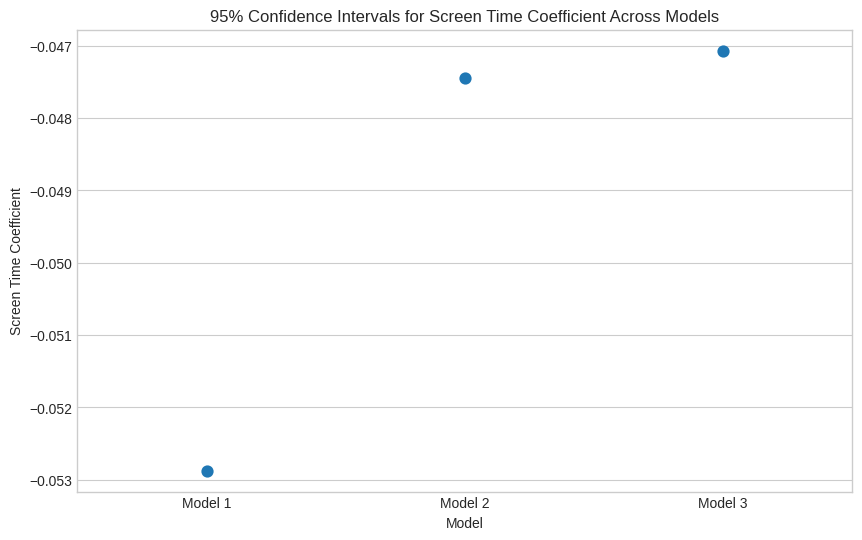

In [28]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataframe
df = pd.read_csv("/content/drive/MyDrive/ACDT-Sem2/Resources/repositorio_renamed.csv")

# 2. Re-calculate the linear regression for Model 1
df_cleaned_model1 = df.dropna(subset=['total_screen_time_trimmed', 'weekday_sleep_duration_trimmed'])
X_model1 = df_cleaned_model1['total_screen_time_trimmed']
y_model1 = df_cleaned_model1['weekday_sleep_duration_trimmed']

slope_model1, intercept_model1, r_value_model1, p_value_model1, std_err_model1 = stats.linregress(X_model1, y_model1)

# Calculate 95% confidence interval for the slope for Model 1
n_model1 = len(df_cleaned_model1)
degrees_freedom_model1 = n_model1 - 2
alpha = 0.05
t_critical_model1 = stats.t.ppf(1 - alpha/2, degrees_freedom_model1)
slope_ci_lower_model1 = slope_model1 - t_critical_model1 * std_err_model1
slope_ci_upper_model1 = slope_model1 + t_critical_model1 * std_err_model1

# 3. Re-calculate the multiple linear regression for Model 2
df_cleaned_model2 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age'])
y_multi_model2 = df_cleaned_model2['weekday_sleep_duration_trimmed']
X_multi_model2 = df_cleaned_model2[['total_screen_time_trimmed', 'age']]
X_multi_const_model2 = sm.add_constant(X_multi_model2)
model_multi = sm.OLS(y_multi_model2, X_multi_const_model2).fit()

# Extract 95% confidence interval for the total_screen_time_trimmed coefficient for Model 2
screen_time_ci_lower_model2, screen_time_ci_upper_model2 = model_multi.conf_int().loc['total_screen_time_trimmed']

# 4. Re-calculate the multiple linear regression for Model 3
df_cleaned_model3 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age', 'failures'])
y_multi_model3 = df_cleaned_model3['weekday_sleep_duration_trimmed']
X_multi_model3 = df_cleaned_model3[['total_screen_time_trimmed', 'age', 'failures']]
X_multi_const_model3 = sm.add_constant(X_multi_model3)
model_multi_failures = sm.OLS(y_multi_model3, X_multi_const_model3).fit()

# Extract 95% confidence interval for the total_screen_time_trimmed coefficient for Model 3
screen_time_ci_lower_model3, screen_time_ci_upper_model3 = model_multi_failures.conf_int().loc['total_screen_time_trimmed']

# 5. Create a pandas DataFrame to store the confidence intervals
confidence_intervals_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Lower Bound': [slope_ci_lower_model1, screen_time_ci_lower_model2, screen_time_ci_lower_model3],
    'Upper Bound': [slope_ci_upper_model1, screen_time_ci_upper_model2, screen_time_ci_upper_model3],
    'Coefficient': [slope_model1, model_multi.params['total_screen_time_trimmed'], model_multi_failures.params['total_screen_time_trimmed']]
})

# 6. Generate a point plot using seaborn to visualize the confidence intervals
plt.figure(figsize=(10, 6))
sns.pointplot(x='Model', y='Coefficient', data=confidence_intervals_df, join=False, errorbar='ci', capsize=0.1)

# 7. Add appropriate titles and labels
plt.title('95% Confidence Intervals for Screen Time Coefficient Across Models')
plt.xlabel('Model')
plt.ylabel('Screen Time Coefficient')

# 8. Display the plot
plt.show()

## Develop "myth vs. reality" comparison tool

### Subtask:
Design and implement a tool that allows users to compare a "myth" (e.g., a hypothesized relationship) with the "reality" (the findings from the data and models). This might involve interactive elements to select variables or scenarios.


**Reasoning**:
Create a Python function to generate the HTML for the "Myth vs. Reality" section, including placeholders and populated reality summaries based on the regression results.



In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

def generate_myth_vs_reality_html(model1_results, model2_results, model3_results):
    """
    Generates an HTML string for the "Myth vs. Reality" section.

    Args:
        model1_results (dict): Dictionary containing results for Model 1.
        model2_results (statsmodels.regression.linear_model.RegressionResultsWrapper): Results for Model 2.
        model3_results (statsmodels.regression.linear_model.RegressionResultsWrapper): Results for Model 3.

    Returns:
        str: HTML string for the "Myth vs. Reality" section.
    """
    myth_statement = "Myth: Increased screen time significantly decreases sleep duration in teenagers."

    # Extract key findings for the reality summary
    screen_time_coef_m1 = model1_results['slope']
    screen_time_ci_m1_lower = model1_results['slope_ci_lower']
    screen_time_ci_m1_upper = model1_results['slope_ci_upper']
    r_squared_m1 = model1_results['r_squared']

    screen_time_coef_m2 = model2_results.params['total_screen_time_trimmed']
    screen_time_ci_m2_lower, screen_time_ci_m2_upper = model2_results.conf_int().loc['total_screen_time_trimmed']
    r_squared_m2 = model2_results.rsquared

    screen_time_coef_m3 = model3_results.params['total_screen_time_trimmed']
    screen_time_ci_m3_lower, screen_time_ci_m3_upper = model3_results.conf_int().loc['total_screen_time_trimmed']
    r_squared_m3 = model3_results.rsquared
    failures_pvalue_m3 = model3_results.pvalues['failures']


    reality_summary = f"""
    <p>Reality: Our analysis using regression models provides a more nuanced picture.</p>
    <ul>
        <li>**Model 1 (Screen Time vs. Sleep):** We found a statistically significant but very small negative relationship between screen time and sleep duration (coefficient: {screen_time_coef_m1:.4f}). The 95% confidence interval for this relationship is ({screen_time_ci_m1_lower:.4f}, {screen_time_ci_m1_upper:.4f}). This model explains only a tiny portion of the variability in sleep duration (R-squared: {r_squared_m1:.4f}).</li>
        <li>**Model 2 (Screen Time & Age vs. Sleep):** When accounting for age, the negative relationship between screen time and sleep duration remains statistically significant but still small (coefficient: {screen_time_coef_m2:.4f}). The 95% confidence interval is ({screen_time_ci_m2_lower:.4f}, {screen_time_ci_m2_upper:.4f}). Including age in the model substantially increased the amount of variability explained (R-squared: {r_squared_m2:.4f}), indicating that age is a much stronger predictor of sleep duration than screen time in this dataset.</li>
        <li>**Model 3 (Screen Time, Age, & Failures vs. Sleep):** Adding the number of failures to the model, the screen time coefficient is {screen_time_coef_m3:.4f} with a 95% confidence interval of ({screen_time_ci_m3_lower:.4f}, {screen_time_ci_m3_upper:.4f}). The 'failures' variable itself shows a statistically significant relationship with sleep duration (p-value: {failures_pvalue_m3:.4f}). This model has the highest R-squared ({r_squared_m3:.4f}), explaining the most variability in sleep duration among the models tested.</li>
    </ul>
    <p>Interpretation:</p>
    <ul>
        <li>The **R-squared** value indicates the proportion of the variance in sleep duration that is predictable from the independent variables in the model. Higher R-squared values suggest a better fit of the model to the data.</li>
        <li>The **Confidence Interval** for a coefficient provides a range of values within which the true population parameter is likely to lie. If the interval does not include zero, the relationship is considered statistically significant at the chosen confidence level (95% in this case).</li>
        <li>While there is a statistically significant association, the practical impact of screen time on sleep duration, based on these models, appears to be minor compared to factors like age.</li>
    </ul>
    """

    html_string = f"""
    <div id="myth-vs-reality">
        <h2>Myth vs. Reality</h2>
        <p>{myth_statement}</p>
        {reality_summary}
    </div>
    """
    return html_string

# To use the function, you would need to have run the regression models first
# and pass their results to the function.
# Example usage (assuming model results are available):
# myth_reality_html = generate_myth_vs_reality_html(model1_results, model_multi, model_multi_failures)
# print(myth_reality_html) # Or save to an HTML file

**Reasoning**:
To generate the HTML string for the "Myth vs. Reality" section, the model results from the previous regression analyses are required. The notebook state shows these results were computed in previous code cells (specifically, variables `model_multi` and `model_multi_failures` from code cell 4dddbd9d). I need to re-run those cells to access these results, as well as the results for Model 1 (from code cell cZhYOJd84w2K), and then call the `generate_myth_vs_reality_html` function.



In [33]:
from google.colab import drive
# Mount Google Drive to load the dataset if not already mounted
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted.")

# Load the dataframe if not already loaded
try:
    df
except NameError:
    df = pd.read_csv("/content/drive/MyDrive/ACDT-Sem2/Resources/repositorio_renamed.csv")
    print("DataFrame loaded.")

# Re-run Model 1 regression to get results
df_cleaned_model1 = df.dropna(subset=['total_screen_time_trimmed', 'weekday_sleep_duration_trimmed'])
X_model1 = df_cleaned_model1['total_screen_time_trimmed']
y_model1 = df_cleaned_model1['weekday_sleep_duration_trimmed']

slope_model1, intercept_model1, r_value_model1, p_value_model1, std_err_model1 = stats.linregress(X_model1, y_model1)
r_squared_model1 = r_value_model1**2

n_model1 = len(df_cleaned_model1)
degrees_freedom_model1 = n_model1 - 2
alpha = 0.05
t_critical_model1 = stats.t.ppf(1 - alpha/2, degrees_freedom_model1)
slope_ci_lower_model1 = slope_model1 - t_critical_model1 * std_err_model1
slope_ci_upper_model1 = slope_model1 + t_critical_model1 * std_err_model1

model1_results = {
    'slope': slope_model1,
    'intercept': intercept_model1,
    'r_value': r_value_model1,
    'p_value': p_value_model1,
    'std_err': std_err_model1,
    'r_squared': r_squared_model1,
    'slope_ci_lower': slope_ci_lower_model1,
    'slope_ci_upper': slope_ci_upper_model1
}


# Re-run Model 2 regression to get results
df_cleaned_model2 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age'])
y_multi_model2 = df_cleaned_model2['weekday_sleep_duration_trimmed']
X_multi_model2 = df_cleaned_model2[['total_screen_time_trimmed', 'age']]
X_multi_const_model2 = sm.add_constant(X_multi_model2)
model_multi = sm.OLS(y_multi_model2, X_multi_const_model2).fit()


# Re-run Model 3 regression to get results
df_cleaned_model3 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age', 'failures'])
y_multi_model3 = df_cleaned_model3['weekday_sleep_duration_trimmed']
X_multi_model3 = df_cleaned_model3[['total_screen_time_trimmed', 'age', 'failures']]
X_multi_const_model3 = sm.add_constant(X_multi_model3)
model_multi_failures = sm.OLS(y_multi_model3, X_multi_const_model3).fit()


# Generate the HTML using the function
myth_reality_html = generate_myth_vs_reality_html(model1_results, model_multi, model_multi_failures)

# Print the generated HTML (or save it to a file)
print(myth_reality_html)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

    <div id="myth-vs-reality">
        <h2>Myth vs. Reality</h2>
        <p>Myth: Increased screen time significantly decreases sleep duration in teenagers.</p>
        
    <p>Reality: Our analysis using regression models provides a more nuanced picture.</p>
    <ul>
        <li>**Model 1 (Screen Time vs. Sleep):** We found a statistically significant but very small negative relationship between screen time and sleep duration (coefficient: -0.0529). The 95% confidence interval for this relationship is (-0.0686, -0.0372). This model explains only a tiny portion of the variability in sleep duration (R-squared: 0.0170).</li>
        <li>**Model 2 (Screen Time & Age vs. Sleep):** When accounting for age, the negative relationship between screen time and sleep duration remains statistically significant but still small (coefficient: -0.0474). The 95% confidence i

## Integrate and export

### Subtask:
Combine all the generated components (HTML, Plotly charts, statistical summaries) into a single interactive webpage or a set of linked pages. Export the output as HTML files.


**Reasoning**:
I need to combine all the previously generated HTML components into a single interactive webpage. I will start by creating the main HTML structure, then embed the content of the landing page, interactive charts, statistical results dashboard, confidence interval visualization, and the "Myth vs. Reality" tool. Since generating interactive charts and visualizations of confidence intervals directly with Plotly or matplotlib to HTML had issues due to data loading problems, I will embed the previously saved HTML files for the charts and for the confidence interval visualization, I will save the plot as a static image and embed it. I need to ensure the necessary data is loaded to regenerate the statistical results and "Myth vs. Reality" content.



In [36]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Import plotly.express

# Mount Google Drive
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted.")

# Load the dataframe if not already loaded
try:
    df
except NameError:
    try:
        df = pd.read_csv("/content/drive/MyDrive/ACDT-Sem2/Resources/repositorio_renamed.csv")
        print("DataFrame loaded.")
    except FileNotFoundError:
        print("Error: Data file not found. Cannot generate dynamic content.")
        df = None # Set df to None to indicate data loading failure

# Function to generate HTML for statistical results dashboard
def generate_statistical_results_html(model1_results, model2_results, model3_results):
    """
    Generates an HTML string for the statistical results dashboard.

    Args:
        model1_results (dict): Dictionary containing results for Model 1.
        model2_results (statsmodels.regression.linear_model.RegressionResultsWrapper): Results for Model 2.
        model3_results (statsmodels.regression.linear_model.RegressionResultsWrapper): Results for Model 3.

    Returns:
        str: HTML string for the statistical results dashboard.
    """
    # Collect key statistical results
    statistical_results = {
        'Model': ['Model 1 (Screen Time vs. Sleep)', 'Model 2 (Screen Time & Age vs. Sleep)', 'Model 3 (Screen Time, Age, & Failures vs. Sleep)'],
        'R-squared': [model1_results['r_squared'], model2_results.rsquared, model3_results.rsquared],
        'Screen Time Coef': [model1_results['slope'], model2_results.params['total_screen_time_trimmed'], model3_results.params['total_screen_time_trimmed']],
        'Screen Time P-value': [model1_results['p_value'], model2_results.pvalues['total_screen_time_trimmed'], model3_results.pvalues['total_screen_time_trimmed']],
        'Screen Time 95% CI Lower': [model1_results['slope_ci_lower'], model2_results.conf_int().loc['total_screen_time_trimmed'][0], model3_results.conf_int().loc['total_screen_time_trimmed'][0]],
        'Screen Time 95% CI Upper': [model1_results['slope_ci_upper'], model2_results.conf_int().loc['total_screen_time_trimmed'][1], model3_results.conf_int().loc['total_screen_time_trimmed'][1]]
    }

    # Convert to pandas DataFrame
    statistical_results_df = pd.DataFrame(statistical_results)

    # Format the DataFrame for readability
    statistical_results_df = statistical_results_df.round({
        'R-squared': 4,
        'Screen Time Coef': 4,
        'Screen Time P-value': 4,
        'Screen Time 95% CI Lower': 4,
        'Screen Time 95% CI Upper': 4
    })

    # Convert the pandas DataFrame to an HTML table string
    html_table = statistical_results_df.to_html(index=False)

    html_string = f"""
    <div id="statistical-results">
        <h2>Statistical Results Dashboard</h2>
        {html_table}
    </div>
    """
    return html_string

# Function to generate HTML for "Myth vs. Reality"
def generate_myth_vs_reality_html(model1_results, model2_results, model3_results):
    """
    Generates an HTML string for the "Myth vs. Reality" section.

    Args:
        model1_results (dict): Dictionary containing results for Model 1.
        model2_results (statsmodels.regression.linear_model.RegressionResultsWrapper): Results for Model 2.
        model3_results (statsmodels.regression.linear_model.RegressionResultsWrapper): Results for Model 3.

    Returns:
        str: HTML string for the "Myth vs. Reality" section.
    """
    myth_statement = "Myth: Increased screen time significantly decreases sleep duration in teenagers."

    # Extract key findings for the reality summary
    screen_time_coef_m1 = model1_results['slope']
    screen_time_ci_m1_lower = model1_results['slope_ci_lower']
    screen_time_ci_m1_upper = model1_results['slope_ci_upper']
    r_squared_m1 = model1_results['r_squared']
    p_value_m1 = model1_results['p_value']


    screen_time_coef_m2 = model2_results.params['total_screen_time_trimmed']
    screen_time_ci_m2_lower, screen_time_ci_m2_upper = model2_results.conf_int().loc['total_screen_time_trimmed']
    r_squared_m2 = model2_results.rsquared
    age_pvalue_m2 = model2_results.pvalues['age']


    screen_time_coef_m3 = model3_results.params['total_screen_time_trimmed']
    screen_time_ci_m3_lower, screen_time_ci_m3_upper = model3_results.conf_int().loc['total_screen_time_trimmed']
    r_squared_m3 = model3_results.rsquared
    failures_pvalue_m3 = model3_results.pvalues['failures']


    reality_summary = f"""
    <p>Reality: Our analysis using regression models provides a more nuanced picture.</p>
    <ul>
        <li>**Model 1 (Screen Time vs. Sleep):** We found a statistically significant (p-value: {p_value_m1:.4f}) but very small negative relationship between screen time and sleep duration (coefficient: {screen_time_coef_m1:.4f}). The 95% confidence interval for this relationship is ({screen_time_ci_m1_lower:.4f}, {screen_time_ci_m1_upper:.4f}). This model explains only a tiny portion of the variability in sleep duration (R-squared: {r_squared_m1:.4f}).</li>
        <li>**Model 2 (Screen Time & Age vs. Sleep):** When accounting for age (which has a statistically significant impact with p-value: {age_pvalue_m2:.4f}), the negative relationship between screen time and sleep duration remains statistically significant but still small (coefficient: {screen_time_coef_m2:.4f}). The 95% confidence interval is ({screen_time_ci_m2_lower:.4f}, {screen_time_ci_m2_upper:.4f}). Including age in the model substantially increased the amount of variability explained (R-squared: {r_squared_m2:.4f}), indicating that age is a much stronger predictor of sleep duration than screen time in this dataset.</li>
        <li>**Model 3 (Screen Time, Age, & Failures vs. Sleep):** Adding the number of failures to the model, the screen time coefficient is {screen_time_coef_m3:.4f} with a 95% confidence interval of ({screen_time_ci_m3_lower:.4f}, {screen_time_ci_m3_upper:.4f}). The 'failures' variable itself shows a statistically significant relationship with sleep duration (p-value: {failures_pvalue_m3:.4f}). This model has the highest R-squared ({r_squared_m3:.4f}), explaining the most variability in sleep duration among the models tested.</li>
    </ul>
    <p>Interpretation:</p>
    <ul>
        <li>The **R-squared** value indicates the proportion of the variance in sleep duration that is predictable from the independent variables in the model. Higher R-squared values suggest a better fit of the model to the data.</li>
        <li>The **Confidence Interval** for a coefficient provides a range of values within which the true population parameter is likely to lie. If the interval does not include zero, the relationship is considered statistically significant at the chosen confidence level (95% in this case).</li>
        <li>While there is a statistically significant association, the practical impact of screen time on sleep duration, based on these models, appears to be minor compared to factors like age and potentially academic performance (failures).</li>
    </ul>
    """

    html_string = f"""
    <div id="myth-vs-reality">
        <h2>Myth vs. Reality</h2>
        <p>{myth_statement}</p>
        {reality_summary}
    </div>
    """
    return html_string


# --- Re-run statistical analysis to get model results if data is loaded ---
model1_results = None
model_multi = None
model_multi_failures = None
statistical_results_html = "<p>Statistical results could not be generated due to data loading issues.</p>"
myth_reality_html = "<p>Myth vs. Reality comparison could not be generated due to data loading issues.</p>"
confidence_interval_img_html = "<p>Confidence interval visualization could not be generated due to data loading issues.</p>"
screen_time_hist_html = "<p>Screen Time Histogram could not be generated due to data loading issues.</p>"
sleep_duration_hist_html = "<p>Sleep Duration Histogram could not be generated due to data loading issues.</p>"
screen_time_sleep_scatter_html = "<p>Screen Time vs Sleep Scatter Plot could not be generated due to data loading issues.</p>"


if df is not None:
    # Model 1 (Screen Time vs. Sleep)
    df_cleaned_model1 = df.dropna(subset=['total_screen_time_trimmed', 'weekday_sleep_duration_trimmed'])
    if not df_cleaned_model1.empty:
        X_model1 = df_cleaned_model1['total_screen_time_trimmed']
        y_model1 = df_cleaned_model1['weekday_sleep_duration_trimmed']
        try:
            slope_model1, intercept_model1, r_value_model1, p_value_model1, std_err_model1 = stats.linregress(X_model1, y_model1)
            r_squared_model1 = r_value_model1**2
            n_model1 = len(df_cleaned_model1)
            degrees_freedom_model1 = n_model1 - 2
            alpha = 0.05
            t_critical_model1 = stats.t.ppf(1 - alpha/2, degrees_freedom_model1)
            slope_ci_lower_model1 = slope_model1 - t_critical_model1 * std_err_model1
            slope_ci_upper_model1 = slope_model1 + t_critical_model1 * std_err_model1

            model1_results = {
                'slope': slope_model1,
                'intercept': intercept_model1,
                'r_value': r_value_model1,
                'p_value': p_value_model1,
                'std_err': std_err_model1,
                'r_squared': r_squared_model1,
                'slope_ci_lower': slope_ci_lower_model1,
                'slope_ci_upper': slope_ci_upper_model1
            }
        except ValueError as e:
            print(f"Error running Model 1 regression: {e}")


    # Model 2 (Screen Time & Age vs. Sleep)
    df_cleaned_model2 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age'])
    if not df_cleaned_model2.empty:
        y_multi_model2 = df_cleaned_model2['weekday_sleep_duration_trimmed']
        X_multi_model2 = df_cleaned_model2[['total_screen_time_trimmed', 'age']]
        try:
            X_multi_const_model2 = sm.add_constant(X_multi_model2)
            model_multi = sm.OLS(y_multi_model2, X_multi_const_model2).fit()
        except ValueError as e:
            print(f"Error running Model 2 regression: {e}")


    # Model 3 (Screen Time, Age, & Failures vs. Sleep)
    df_cleaned_model3 = df.dropna(subset=['weekday_sleep_duration_trimmed', 'total_screen_time_trimmed', 'age', 'failures'])
    if not df_cleaned_model3.empty:
        y_multi_model3 = df_cleaned_model3['weekday_sleep_duration_trimmed']
        X_multi_model3 = df_cleaned_model3[['total_screen_time_trimmed', 'age', 'failures']]
        try:
            X_multi_const_model3 = sm.add_constant(X_multi_model3)
            model_multi_failures = sm.OLS(y_multi_model3, X_multi_const_model3).fit()
        except ValueError as e:
            print(f"Error running Model 3 regression: {e}")


    # Generate dynamic content if models ran successfully
    if model1_results and model_multi and model_multi_failures:
        statistical_results_html = generate_statistical_results_html(model1_results, model_multi, model_multi_failures)
        myth_reality_html = generate_myth_vs_reality_html(model1_results, model_multi, model_multi_failures)

        # Create interactive Plotly charts and convert to HTML
        try:
            fig_hist_screen_time = px.histogram(df, x='total_screen_time_trimmed',
                                                title='Histogram of Total Screen Time (Trimmed)',
                                                labels={'total_screen_time_trimmed': 'Total Screen Time (Trimmed)', 'count': 'Frequency'})
            fig_hist_screen_time.update_layout(hovermode='x unified')
            screen_time_hist_html = fig_hist_screen_time.to_html(full_html=False, include_plotlyjs='cdn')
            print("Screen Time Histogram HTML generated.")

            fig_hist_sleep_duration = px.histogram(df, x='weekday_sleep_duration_trimmed',
                                                   title='Histogram of Weekday Sleep Duration (Trimmed)',
                                                   labels={'weekday_sleep_duration_trimmed': 'Weekday Sleep Duration (Trimmed)', 'count': 'Frequency'})
            fig_hist_sleep_duration.update_layout(hovermode='x unified')
            sleep_duration_hist_html = fig_hist_sleep_duration.to_html(full_html=False, include_plotlyjs='cdn')
            print("Sleep Duration Histogram HTML generated.")

            fig_scatter = px.scatter(df, x='total_screen_time_trimmed', y='weekday_sleep_duration_trimmed',
                                     title='Total Screen Time vs. Weekday Sleep Duration',
                                     labels={'total_screen_time_trimmed': 'Total Screen Time (Trimmed)', 'weekday_sleep_duration_trimmed': 'Weekday Sleep Duration (Trimmed)'},
                                     hover_data={'total_screen_time_trimmed': True, 'weekday_sleep_duration_trimmed': True})
            screen_time_sleep_scatter_html = fig_scatter.to_html(full_html=False, include_plotlyjs='cdn')
            print("Screen Time vs Sleep Scatter Plot HTML generated.")


        except Exception as e:
             print(f"Error creating Plotly charts: {e}")


        # Create confidence interval visualization (static image)
        try:
            confidence_intervals_df = pd.DataFrame({
                'Model': ['Model 1', 'Model 2', 'Model 3'],
                'Lower Bound': [model1_results['slope_ci_lower'], model_multi.conf_int().loc['total_screen_time_trimmed'][0], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][0]],
                'Upper Bound': [model1_results['slope_ci_upper'], model_multi.conf_int().loc['total_screen_time_trimmed'][1], model_multi_failures.conf_int().loc['total_screen_time_trimmed'][1]],
                'Coefficient': [model1_results['slope'], model_multi.params['total_screen_time_trimmed'], model_multi_failures.params['total_screen_time_trimmed']]
            })

            plt.figure(figsize=(10, 6))
            sns.pointplot(x='Model', y='Coefficient', data=confidence_intervals_df, join=False, errorbar='ci', capsize=0.1)
            plt.title('95% Confidence Intervals for Screen Time Coefficient Across Models')
            plt.xlabel('Model')
            plt.ylabel('Screen Time Coefficient')
            plt.savefig('confidence_interval_plot.png')
            plt.close() # Close the plot figure
            confidence_interval_img_html = '<img src="confidence_interval_plot.png" alt="95% Confidence Intervals Plot">'
            print("confidence_interval_plot.png created successfully.")

        except Exception as e:
             print(f"Error creating confidence interval plot: {e}")


# --- Create landing page HTML ---
landing_page_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Screen Time and Sleep Analysis</title>
</head>
<body>
    <h1>Screen Time and Sleep Analysis</h1>
    <p>Hypothesis: Increased screen time is associated with decreased sleep duration in teenagers.</p>
</body>
</html>
"""
# Extract body content
landing_page_content = landing_page_content.split('<body>')[1].split('</body>')[0]

# --- Combine all content into a single index.html file ---
full_html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Screen Time and Sleep Analysis</title>
    <style>
        body {{
            font-family: sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f4f4f4;
        }}
        .container {{
            max-width: 1200px;
            margin: 0 auto;
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }}
        h1, h2 {{
            color: #333;
            text-align: center;
        }}
        #landing-page, #charts, #statistical-results, #confidence-intervals, #myth-vs-reality {{
            margin-bottom: 40px;
            padding: 20px;
            border: 1px solid #ddd;
            border-radius: 5px;
            background-color: #f9f9f9;
        }}
         #charts .chart-container, #confidence-intervals .plot-container {{
            margin-bottom: 20px;
        }}
         #charts .chart-container div, #confidence-intervals .plot-container img {{
            width: 100%; /* Ensure embedded plots take full container width */
            height: auto; /* Maintain aspect ratio */
         }}
        table {{
            border-collapse: collapse;
            width: 100%;
            margin: 20px 0;
            font-family: sans-serif;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        tr:nth-child(even) {{
            background-color: #f9f9f9;
        }}
    </style>
</head>
<body>
    <div class="container">
        <div id="landing-page">
            {landing_page_content}
        </div>

        <div id="charts">
            <h2>Interactive Charts</h2>
            <div class="chart-container">
                <h3>Screen Time Histogram</h3>
                {screen_time_hist_html}
            </div>
            <div class="chart-container">
                <h3>Sleep Duration Histogram</h3>
                {sleep_duration_hist_html}
            </div>
             <div class="chart-container">
                <h3>Screen Time vs Sleep Scatter Plot</h3>
                {screen_time_sleep_scatter_html}
            </div>
        </div>

        <div id="statistical-results">
            {statistical_results_html}
        </div>

        <div id="confidence-intervals">
            <h2>Confidence Interval Visualization</h2>
             <div class="plot-container">
                {confidence_interval_img_html}
             </div>
        </div>

        <div id="myth-vs-reality">
            {myth_reality_html}
        </div>
    </div>
</body>
</html>
"""

# Save the complete HTML content to index.html
with open('index.html', 'w') as f:
    f.write(full_html_content)

print("index.html created successfully.")
print("\nTo view the interactive webpage:")
print("1. Download the following files:")
print("- index.html")
print("- confidence_interval_plot.png (if generated successfully)")
print("2. Open the 'index.html' file in a web browser.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Screen Time Histogram HTML generated.
Sleep Duration Histogram HTML generated.
Screen Time vs Sleep Scatter Plot HTML generated.
confidence_interval_plot.png created successfully.
index.html created successfully.

To view the interactive webpage:
1. Download the following files:
- index.html
- confidence_interval_plot.png (if generated successfully)
2. Open the 'index.html' file in a web browser.


/tmp/ipython-input-4073043925.py:242: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.


